<a href="https://colab.research.google.com/github/NguyenPhuongDng/Stock-Price-Prediction/blob/main/FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd

### ƒê·ªçc file (Kh√¥ng s·ª≠a ch·ªó n√†y) (D·ªØ li·ªáu ·ªü tr√™n github)

In [131]:
df = pd.read_csv('fpt_lsg.csv')

In [132]:
df

Ng√†y  Gi√° ƒë√≥ng c·ª≠a  Gi√° ƒëi·ªÅu ch·ªânh       Thay ƒë·ªïi  \
0     2025-05-08         114.3             NaN    4.6(4.19 %)   
1     2025-05-07         109.7             NaN      0(0.00 %)   
2     2025-05-06         109.7             NaN    1.1(1.01 %)   
3     2025-05-05         108.6             NaN  -0.8(-0.73 %)   
4     2025-04-29         109.4             NaN  -0.1(-0.09 %)   
...          ...           ...             ...            ...   
4577  2006-12-19         486.0           13.90     23(4.97 %)   
4578  2006-12-18         463.0           13.24     22(4.99 %)   
4579  2006-12-15         441.0           12.61     21(5.00 %)   
4580  2006-12-14         420.0           12.01     20(5.00 %)   
4581  2006-12-13         400.0           11.44      0(0.00 %)   

      KL gd kh·ªõp l·ªánh  GT gd kh·ªõp l·ªánh  KL gd th·ªèa thu·∫≠n  GT gd th·ªèa thu·∫≠n  \
0            12644900          1417.70                 0              0.00   
1             3926800           431.12            452500             49.50   
2             5686200           626.04           1045000            116.19   
3             7167600           773.26            452500             49.50   
4             2945500           322.61           3264400            367.59   
...               ...              ...               ...               ...   
4577           137520             0.07                 0              0.00   
4578           215790             0.10             10000              0.00   
4579           265300             0.12             30000              0.01   
4580           280710             0.12             96000              0.04   
4581            83530             0.03                 0              0.00   

      Gi√° m·ªü c·ª≠a  Gi√° cao nh·∫•t  Gi√° th·∫•p nh·∫•t  
0          110.4         114.6          109.0  
1          109.6         111.2          108.9  
2          108.6         111.0          108.6  
3          109.5         109.7          106.9  
4          109.6         110.5          109.1  
...          ...           ...            ...  
4577       486.0         486.0          486.0  
4578       463.0         463.0          463.0  
4579       441.0         441.0          441.0  
4580       420.0         420.0          420.0  
4581       400.0         400.0          400.0  

[4582 rows x 11 columns]

In [133]:
df = df[['Ng√†y', 'Gi√° ƒë√≥ng c·ª≠a']]

In [134]:
df.head()

Ng√†y  Gi√° ƒë√≥ng c·ª≠a
0  2025-05-08         114.3
1  2025-05-07         109.7
2  2025-05-06         109.7
3  2025-05-05         108.6
4  2025-04-29         109.4

B·ªé nan

In [135]:
nan_counts = df.isna().sum()
print(nan_counts)
df = df.dropna()

Ng√†y            0
Gi√° ƒë√≥ng c·ª≠a    0
dtype: int64


Chuy·ªÉn ng√†y th√†nh d·∫°ng object v√† soft t·ª´ d∆∞·ªõi l√™n

In [136]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [137]:
df['Ng√†y'] = df['Ng√†y'].apply(str_to_datetime)

In [138]:
df.index = df.pop('Ng√†y')

In [139]:
df = df.sort_index()

print(df.index.is_monotonic_increasing)


True


In [140]:
df.head()

Gi√° ƒë√≥ng c·ª≠a
Ng√†y                    
2006-12-13         400.0
2006-12-14         420.0
2006-12-15         441.0
2006-12-18         463.0
2006-12-19         486.0

visualize th√¥

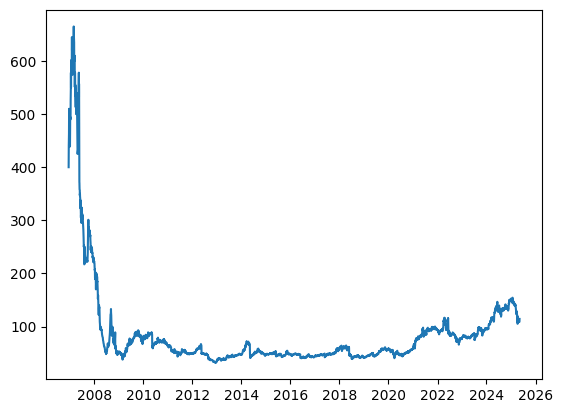

In [141]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Gi√° ƒë√≥ng c·ª≠a'])

### t√≠nh ƒë·∫∑c tr∆∞ng (L√†m ·ªü ƒë√¢y)

In [142]:
# Feature1: Simple Moving Average (SMA)
df['SMA_20'] = df['Gi√° ƒë√≥ng c·ª≠a'].rolling(window=20).mean()

In [143]:
# Feature2: Exponential Moving Average (EMA) 20
df['EMA_20'] = df['Gi√° ƒë√≥ng c·ª≠a'].ewm(span=20, adjust=False).mean()

In [145]:
# Feature3: MACD line & signal
ema12 = df['Gi√° ƒë√≥ng c·ª≠a'].ewm(span=12, adjust=False).mean()
ema26 = df['Gi√° ƒë√≥ng c·ª≠a'].ewm(span=26, adjust=False).mean()
df['MACD']        = ema12 - ema26
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
# Histogram
df['MACD_hist']   = df['MACD'] - df['MACD_signal']

In [166]:
# Feature4: RSI
delta = df['Gi√° ƒë√≥ng c·ª≠a'].diff()

# Ph√¢n t√°ch tƒÉng/gi·∫£m
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# T√≠nh trung b√¨nh l≈©y th·ª´a (EMA) c·ªßa gain/loss
window = 14
avg_gain = gain.rolling(window=window).mean()
avg_loss = loss.rolling(window=window).mean()

# T√≠nh RS (Relative Strength)
rs = avg_gain / avg_loss

# T√≠nh RSI
df['RSI_14'] = 100 - (100 / (1 + rs))

In [167]:
df.head()

Gi√° ƒë√≥ng c·ª≠a  SMA_20      EMA_20       MACD  MACD_signal  \
Ng√†y                                                                   
2006-12-13         400.0     0.0  400.000000   0.000000     0.000000   
2006-12-14         420.0     0.0  401.904762   1.595442     0.319088   
2006-12-15         441.0     0.0  405.628118   4.502463     1.155763   
2006-12-18         463.0     0.0  411.092107   8.483720     2.621355   
2006-12-19         486.0     0.0  418.226192  13.341016     4.765287   

            MACD_hist  RSI_14  
Ng√†y                           
2006-12-13   0.000000     NaN  
2006-12-14   1.276353     NaN  
2006-12-15   3.346700     NaN  
2006-12-18   5.862366     NaN  
2006-12-19   8.575729     NaN

Gi√° ƒë√≥ng c·ª≠a   SMA_20      EMA_20       MACD  MACD_signal  \
Ng√†y                                                                    
2006-12-13         400.0    0.000  400.000000   0.000000     0.000000   
2006-12-14         420.0    0.000  401.904762   1.595442     0.319088   
2006-12-15         441.0    0.000  405.628118   4.502463     1.155763   
2006-12-18         463.0    0.000  411.092107   8.483720     2.621355   
2006-12-19         486.0    0.000  418.226192  13.341016     4.765287   
...                  ...      ...         ...        ...          ...   
2025-04-29         109.4  112.485  114.099460  -4.391290    -5.040387   
2025-05-05         108.6  111.890  113.575702  -4.315617    -4.895433   
2025-05-06         109.7  111.275  113.206588  -4.119399    -4.740226   
2025-05-07         109.7  111.085  112.872627  -3.918722    -4.575925   
2025-05-08         114.3  111.150  113.008567  -3.349887    -4.330718   

            MACD_hist     RSI_14  
Ng√†y                              
2006-12-13   0.000000   0.000000  
2006-12-14   1.276353   0.000000  
2006-12-15   3.346700   0.000000  
2006-12-18   5.862366   0.000000  
2006-12-19   8.575729   0.000000  
...               ...        ...  
2025-04-29   0.649098  56.047198  
2025-05-05   0.579816  42.700730  
2025-05-06   0.620827  30.530973  
2025-05-07   0.657203  30.530973  
2025-05-08   0.980830  46.558704  

[4582 rows x 7 columns]

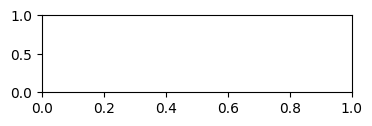

In [168]:
# Gi·∫£ s·ª≠ b·∫°n ƒë√£ c√≥ df v·ªõi c√°c c·ªôt Close, Pct_Change,‚Ä¶ ch·ª©a NaN
# C√°ch 1: Thay NaN cho to√†n b·ªô DataFrame
df = df.fillna(0)
df


In [156]:
# from sklearn.preprocessing import MinMaxScaler

# features = ['Gi√° ƒë√≥ng c·ª≠a','SMA_20','EMA_20','MACD','MACD_signal','MACD_hist']

# scaler = MinMaxScaler(feature_range=(0,1))
# df_scaled = df.copy()

# # ch·ªâ scale c·ªôt features, gi·ªØ nguy√™n index
# df_scaled[features] = scaler.fit_transform(df[features])

# # b√¢y gi·ªù t·∫•t c·∫£ c√°c feature ƒë·ªÅu n·∫±m trong [0,1]


### Visualize

In [161]:
corr = df_scaled.corr()
print(corr)

              Gi√° ƒë√≥ng c·ª≠a    SMA_20    EMA_20      MACD  MACD_signal  \
Gi√° ƒë√≥ng c·ª≠a      1.000000  0.925763  0.993100  0.016809     0.028489   
SMA_20            0.925763  1.000000  0.942899 -0.147639    -0.101782   
EMA_20            0.993100  0.942899  1.000000 -0.078592    -0.050491   
MACD              0.016809 -0.147639 -0.078592  1.000000     0.967346   
MACD_signal       0.028489 -0.101782 -0.050491  0.967346     1.000000   
MACD_hist        -0.041421 -0.197378 -0.119022  0.286152     0.033945   

              MACD_hist  
Gi√° ƒë√≥ng c·ª≠a  -0.041421  
SMA_20        -0.197378  
EMA_20        -0.119022  
MACD           0.286152  
MACD_signal    0.033945  
MACD_hist      1.000000  


In [177]:
df_new = df[4000:]

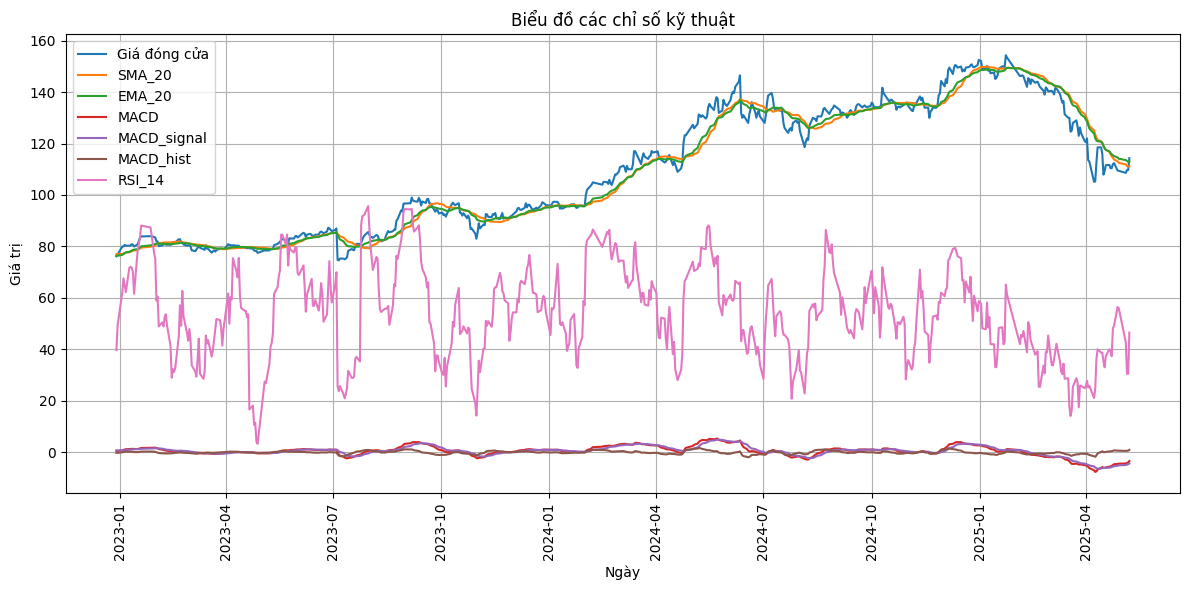

In [179]:
plt.figure(figsize=(12, 6))

plt.plot(df_new.index, df_new['Gi√° ƒë√≥ng c·ª≠a'], label='Gi√° ƒë√≥ng c·ª≠a')
plt.plot(df_new.index, df_new['SMA_20'], label='SMA_20')
plt.plot(df_new.index, df_new['EMA_20'], label='EMA_20')
plt.plot(df_new.index, df_new['MACD'], label='MACD')
plt.plot(df_new.index, df_new['MACD_signal'], label='MACD_signal')
plt.plot(df_new.index, df_new['MACD_hist'], label='MACD_hist')
plt.plot(df_new.index, df_new['RSI_14'], label='RSI_14')

plt.legend()
plt.title("Bi·ªÉu ƒë·ªì c√°c ch·ªâ s·ªë k·ªπ thu·∫≠t")
plt.xlabel("Ng√†y")
plt.ylabel("Gi√° tr·ªã")
plt.xticks(rotation=90)  # üëâ Xoay ng√†y theo chi·ªÅu d·ªçc
plt.tight_layout()
plt.grid(True)
plt.show()


### Save file

In [170]:
# Gi·ªØ index (Date) v√† ghi nh√£n c·ªôt index l√† ‚ÄúDate‚Äù
df.to_csv('add_features.csv', index=True, index_label='Date', encoding='utf-8')
